# Impoart

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bbox_visualizer as bbv


from VOC2012_MaskRCNN_InstanceSegmentation import *
from torch.nn.parallel import DistributedDataParallel as DDP

Customized: torchvision.models.detection.roi_heads.maskrcnn_loss


In [5]:
np.random.seed(0)
device = "cpu"
t_dataset, t_dataloader, v_dataset, v_dataloader = Task.get_dataset_and_loader(10)
model = Task.get_model("./result/benchmark/step_model(20-epoch)")

for iou_threshold in [0.3, 0.5, 0.6]:
    map = Task.map_eval(model, device, v_dataloader, iou_threshold = iou_threshold)
    print(f"map({iou_threshold}): {map}")

  0%|          | 0/145 [00:11<?, ?it/s]


KeyboardInterrupt: 

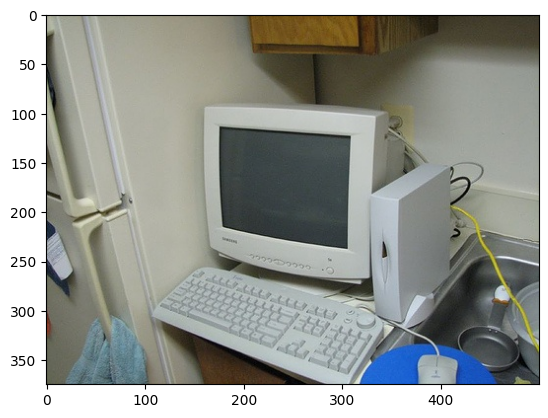

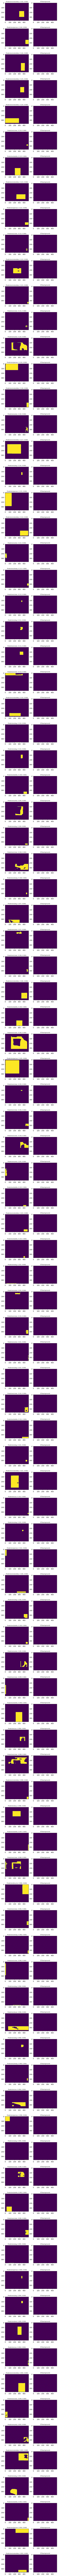

In [6]:
dataset = t_dataset
sample = dataset[1]
plt.imshow(Converter.tensor_to_numpy_for_image(sample[0]))
Task.show_comparison_for_one_sample(model, sample, device, iou_threshold=0.5, mask_binary_threshold=0.3)

In [ ]:
with open("loss/no_expending(1th).p", "rb") as file:
    loss_list = pickle.load(file)

train_loss_list = [x.detach() for x in loss_list["train_loss_list"]]
val_loss_list = loss_list["val_loss_list"]
plt.plot(train_loss_list)
plt.plot(val_loss_list)